Current working directory: C:\Users\hp\solar-challenge-week1\notebooks
Columns in dataset: Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

Missing Values:
 Comments    525600
dtype: int64


<Figure size 1500x500 with 0 Axes>

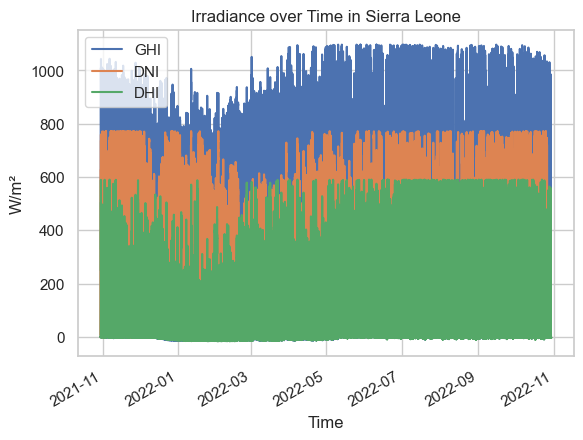

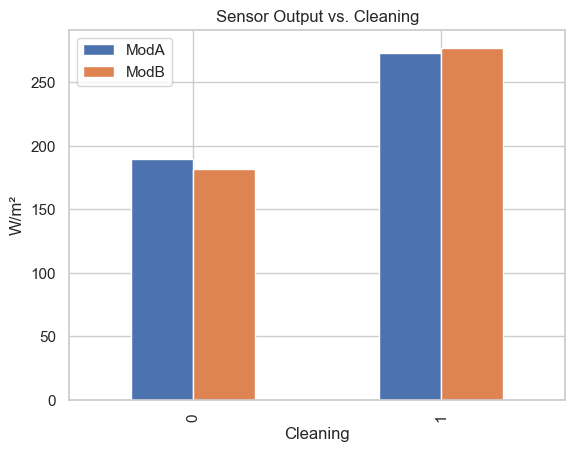

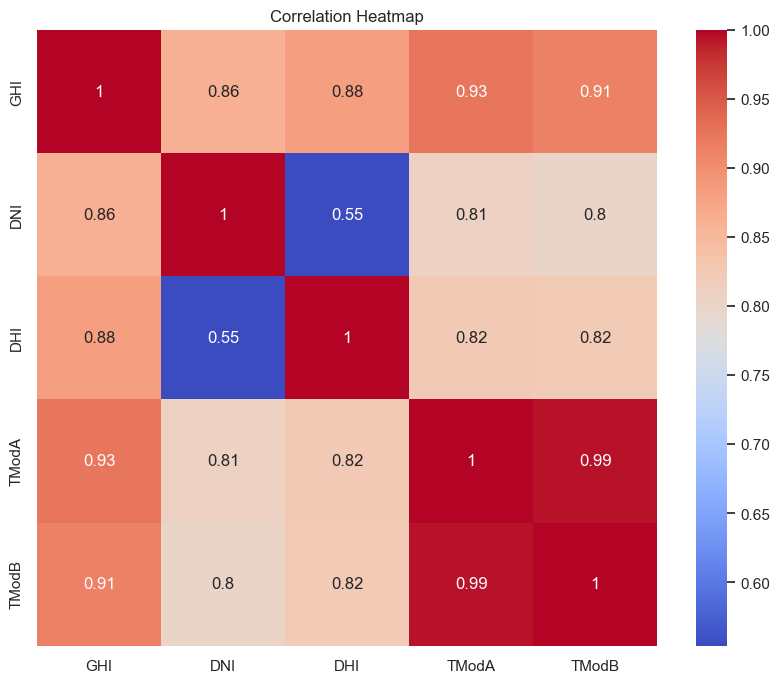

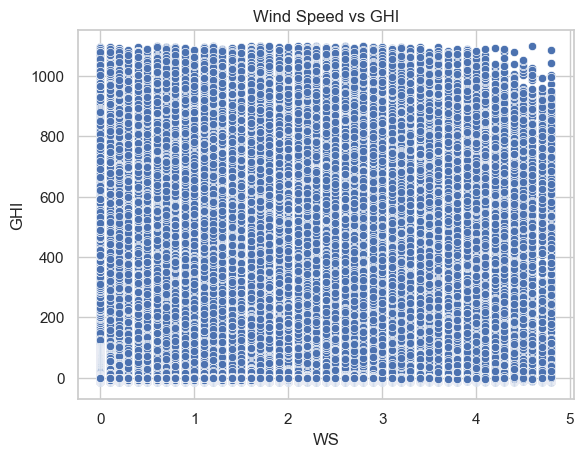

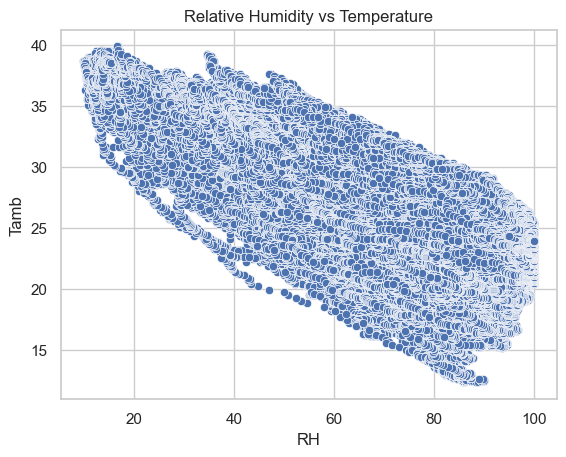

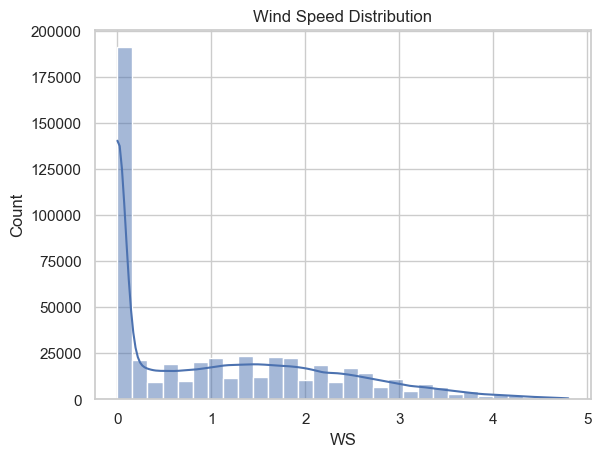

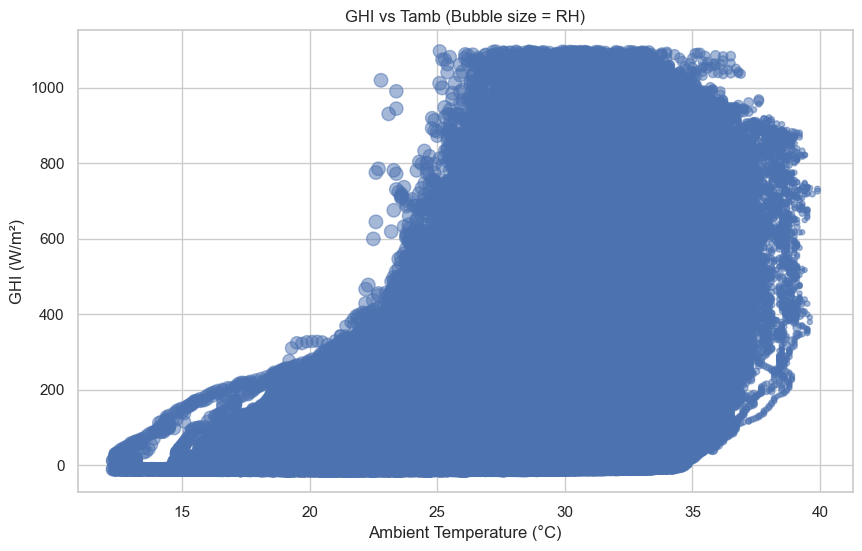


Cleaned data exported to: ../data/processed/sierra_leone_clean.csv


In [20]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import os

# Optional: For better plots
sns.set(style="whitegrid")

# Check current working directory (optional)
print("Current working directory:", os.getcwd())

# Step 2: Load Data with correct relative path
df = pd.read_csv('../data/raw/sierraleone-bumbuna.csv', parse_dates=['Timestamp'])

# Step 3: Inspect Columns and Handle Missing/Invalid Values
print("Columns in dataset:", df.columns)

# Replace any common invalid values with NaN (optional, depending on your dataset)
df.replace(['NA', -9999], np.nan, inplace=True)

# Step 4: Summary Stats and Missing Value Report
summary = df.describe()
missing = df.isna().sum()
print("\nMissing Values:\n", missing[missing > 0])

# Step 5: Handle Missing Values in Key Numeric Columns
numeric_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Step 6: Outlier Detection and Removal Using Z-score
z_scores = df[numeric_cols].apply(zscore)
df = df[(np.abs(z_scores) < 3).all(axis=1)]  # keep only rows within ±3 std dev

# Step 7: Time Series Plot of Irradiance
plt.figure(figsize=(15,5))
df.set_index('Timestamp')[['GHI', 'DNI', 'DHI']].plot()
plt.title('Irradiance over Time in Sierra Leone')
plt.ylabel('W/m²')
plt.xlabel('Time')
plt.grid(True)
plt.show()

# Step 8: Sensor Cleaning Impact on Output
if 'Cleaning' in df.columns:
    df_cleaning = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
    df_cleaning.plot(kind='bar', title='Sensor Output vs. Cleaning')
    plt.ylabel('W/m²')
    plt.show()
else:
    print("Column 'Cleaning' not found, skipping cleaning impact plot.")

# Step 9: Correlation Heatmap
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
available_corr_cols = [col for col in corr_cols if col in df.columns]
plt.figure(figsize=(10, 8))
sns.heatmap(df[available_corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Step 10: Scatter Plots
if 'WS' in df.columns:
    sns.scatterplot(x='WS', y='GHI', data=df)
    plt.title('Wind Speed vs GHI')
    plt.show()

if 'RH' in df.columns and 'Tamb' in df.columns:
    sns.scatterplot(x='RH', y='Tamb', data=df)
    plt.title('Relative Humidity vs Temperature')
    plt.show()

# Step 11: Wind Speed Distribution Histogram
if 'WS' in df.columns:
    sns.histplot(df['WS'], bins=30, kde=True)
    plt.title('Wind Speed Distribution')
    plt.show()

# Step 12: GHI vs Tamb Bubble Chart (size = RH)
if all(col in df.columns for col in ['Tamb', 'GHI', 'RH']):
    plt.figure(figsize=(10,6))
    plt.scatter(df['Tamb'], df['GHI'], s=df['RH'], alpha=0.5)
    plt.title('GHI vs Tamb (Bubble size = RH)')
    plt.xlabel('Ambient Temperature (°C)')
    plt.ylabel('GHI (W/m²)')
    plt.show()

# Step 13: Export Cleaned Data to processed folder
df.to_csv('../data/processed/sierra_leone_clean.csv', index=False)
print("\nCleaned data exported to: ../data/processed/sierra_leone_clean.csv")

